In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv')
test_df = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTest.csv')

# Display the first few rows of the modified training dataset
print(train_df.head())

# Change the labels in both training and testing datasets
train_df['LABEL'] = train_df['LABEL'].map({2: 1, 1: 0})
test_df['LABEL'] = test_df['LABEL'].map({2: 1, 1: 0})

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [3]:
# Display the first few rows of the modified training dataset to verify the changes
train_df.head()

# Check and handle missing data
missing_values_train = train_df.isnull().sum().sum()
missing_values_test = test_df.isnull().sum().sum()
if missing_values_train > 0 or missing_values_test > 0:
    imputer = SimpleImputer(strategy='median')
    train_df.iloc[:, 1:] = imputer.fit_transform(train_df.iloc[:, 1:])
    test_df.iloc[:, 1:] = imputer.transform(test_df.iloc[:, 1:])
else:
    print("No missing values found.")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df.iloc[:, 1:])
X_test = scaler.transform(test_df.iloc[:, 1:])


No missing values found.


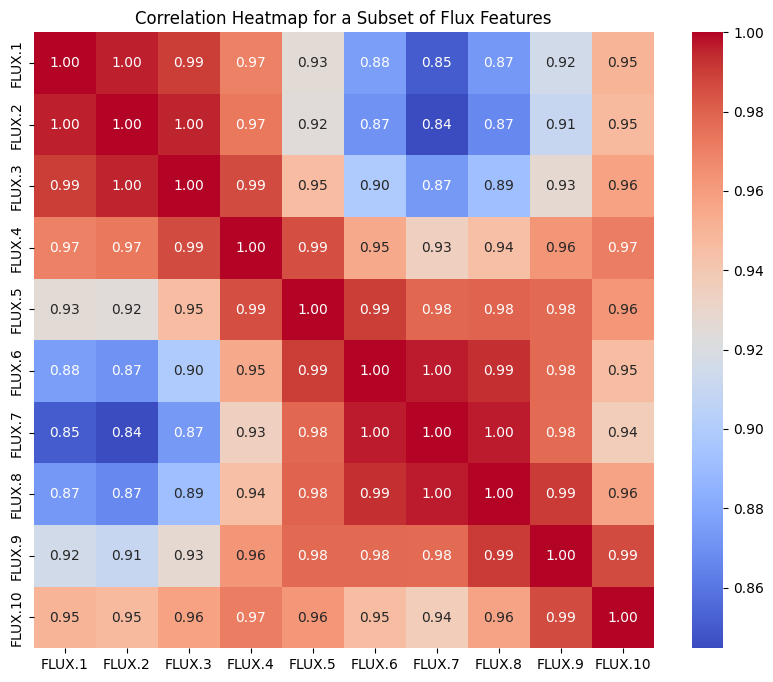

In [4]:
# Calculate the correlation matrix for a subset of flux columns
corr = train_df.iloc[:, 1:11].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for a Subset of Flux Features')
plt.show()

In [5]:
train_y=train_df[train_df['LABEL'] == 1]
train_n=train_df[train_df['LABEL'] < 1]
train_t_n=train_n.iloc[:,1:].T
train_t_y=train_y.iloc[:,1:].T
train_t_y.head(1)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.1,9.34,238.77,-103.54,-265.91,...,124.39,-63.5,31.29,-472.5,194.82,26.96,43.07,-248.23,22.82,26.24


In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086", 
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=train_t_n[37], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_n[3000], x=train_t_n.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [7]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 0", "Flux variation of star 1", 
                                                   "Flux variation of star 35", "Flux variation of star 36"))
fig.add_trace(
    go.Scatter(y=train_t_y[0], x=train_t_y.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[1], x=train_t_y.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_y[35], x=train_t_y.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[36], x=train_t_y.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Exoplanets Stars examples",showlegend=False)

In [8]:
# Display the class distribution before oversampling
print("Class distribution before oversampling:", train_df['LABEL'].value_counts())


Class distribution before oversampling: LABEL
0    5050
1      37
Name: count, dtype: int64


In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Setup a pipeline of oversampling followed by undersampling
over = SMOTE(sampling_strategy=0.1)  # Oversample to 10% of majority class
under = RandomUnderSampler(sampling_strategy=0.5)  # Reduce the majority class to double the minority class
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline
X = train_df.drop('LABEL', axis=1)
y = train_df['LABEL']
X_resampled, y_resampled = pipeline.fit_resample(X, y)
train_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_df_resampled['LABEL'] = y_resampled

print("New class distribution after combined resampling:", train_df_resampled['LABEL'].value_counts())

New class distribution after combined resampling: LABEL
0    1010
1     505
Name: count, dtype: int64


/tmp/ipykernel_95/2124042672.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


X = train_df_resampled.drop('LABEL', axis=1)
y = train_df_resampled['LABEL']


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# C values to test
C_values = [0.01, 0.1, 1.0]

for C in C_values:
    # Logistic Regression model
    logistic_model = LogisticRegression(C=C, max_iter=1000)  # Increased max_iter for convergence
    logistic_model.fit(X_train, y_train)

    # Making predictions
    y_pred_logistic = logistic_model.predict(X_test)

    # Evaluating the model
    print(f"Results for C={C}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
    print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
    print("------------------------------------------------------")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Results for C=0.01:
Accuracy: 0.7986798679867987
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       196
           1       0.64      1.00      0.78       107

    accuracy                           0.80       303
   macro avg       0.82      0.84      0.80       303
weighted avg       0.87      0.80      0.80       303

------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Results for C=0.1:
Accuracy: 0.8151815181518152
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83       196
           1       0.66      1.00      0.79       107

    accuracy                           0.82       303
   macro avg       0.83      0.86      0.81       303
weighted avg       0.88      0.82      0.82       303

------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Results for C=1.0:
Accuracy: 0.8151815181518152
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83       196
           1       0.66      1.00      0.79       107

    accuracy                           0.82       303
   macro avg       0.83      0.86      0.81       303
weighted avg       0.88      0.82      0.82       303

------------------------------------------------------


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine Configuration
C_values = [0.5, 1, 2]  # C values to test

# Train and evaluate the model for each C value
for C in C_values:
    svm_model = SVC(kernel='rbf', C=C, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Results for C={C}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_mat)
    print(class_report)
    print("------------------------------------------------------")

Results for C=0.5:
Accuracy: 0.6501650165016502
Confusion Matrix:
 [[196   0]
 [106   1]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       196
           1       1.00      0.01      0.02       107

    accuracy                           0.65       303
   macro avg       0.82      0.50      0.40       303
weighted avg       0.77      0.65      0.52       303

------------------------------------------------------
Results for C=1:
Accuracy: 0.6534653465346535
Confusion Matrix:
 [[194   2]
 [103   4]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       196
           1       0.67      0.04      0.07       107

    accuracy                           0.65       303
   macro avg       0.66      0.51      0.43       303
weighted avg       0.66      0.65      0.53       303

------------------------------------------------------
Results for C=2:
Accuracy: 0.6600660066006601
Confusion Ma

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of neighbors to test
neighbors_settings = [1, 3, 5, 7, 9]

for n_neighbors in neighbors_settings:
    # KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Results for n_neighbors={n_neighbors}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_mat)
    print(class_report)
    print("------------------------------------------------------")

Results for n_neighbors=1:
Accuracy: 0.9834983498349835
Confusion Matrix:
 [[191   5]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       196
           1       0.96      1.00      0.98       107

    accuracy                           0.98       303
   macro avg       0.98      0.99      0.98       303
weighted avg       0.98      0.98      0.98       303

------------------------------------------------------
Results for n_neighbors=3:
Accuracy: 0.9735973597359736
Confusion Matrix:
 [[188   8]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       196
           1       0.93      1.00      0.96       107

    accuracy                           0.97       303
   macro avg       0.97      0.98      0.97       303
weighted avg       0.98      0.97      0.97       303

------------------------------------------------------
Results for n_neighbors=5:
Accuracy: 0.9

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    # Neural network architecture
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer + hidden layer
        Dense(64, activation='relu'),  # Additional hidden layer
        Dense(1, activation='sigmoid')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

    # Making predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Results for Learning Rate {lr}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_mat)
    print(class_report)
    print("------------------------------------------------------")

2024-05-03 15:54:49.229518: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 15:54:49.229593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 15:54:49.230966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training model with learning rate: 0.001


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
 95/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6296

I0000 00:00:1714751695.735435     159 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714751695.751411     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6838 - loss: 0.6175
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.6104
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.3934
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.2957
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2543
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.2053
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.1239
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0934
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0580
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9972 - loss: 0.0317
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0458
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



100/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6911 - loss: 2.2020

W0000 00:00:1714751709.065660     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6907 - loss: 2.2781
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 3.5207
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 2.0469
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.5934
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.4143
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3453
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.2991
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2320
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3269
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1412
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.1043
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 94/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 177.6160

W0000 00:00:1714751721.931046     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5523 - loss: 171.4775
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 1.8400
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6663 - loss: 0.6388
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.6393
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 0.6328
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - loss: 0.6187
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.6327
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.6107
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - loss: 0.6265
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.6191
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.6349
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

